## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import random
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("./ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
count = df[['group', 'landing_page']].value_counts()
print("The number of times the new_page and treatment don't line up: {}".format(count[2] + count[3]))

The number of times the new_page and treatment don't line up: 3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any(axis=1)
print("No rows have missing values")

No rows have missing values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df_control_drop = df.query(
    '(group == "control" and landing_page == "new_page") | (group == "treatment" and landing_page == "old_page")'
)
df2 = df.drop(df_control_drop.index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
int(df2[df2.duplicated(subset=['user_id'])]['user_id'].values)

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop_duplicates(subset=['user_id'], keep='first', inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print("Probability of converting regardless of page: {}".format(df2['converted'].mean()))

Probability of converting regardless of page: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
print("The probability of converting when an individual was in the control group: {}".format(df2.groupby(df2['group'])['converted'].mean()[0]))

The probability of converting when an individual was in the control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
print("The probability of converting when an individual was in the treatment group: {}".format(df2.groupby(df2['group'])['converted'].mean()[1]))

The probability of converting when an individual was in the treatment group: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
df2.groupby(['landing_page'])['converted'].mean()

landing_page
new_page    0.118808
old_page    0.120386
Name: converted, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer**
> Evidently speaking, given that they have the same population, we cannot end up that the new page layout is helping in increasing the number conversion rate. As resulted above, only around 12% of the *treatment* and *control* customers have purchased one of the company's product due to an effect of the new page layout.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer**
* **Null Hypotheses**: the *old page layout* records the same or more conversion rate than the *new page layout*.
* **Alternative Hypotheses**: the *new page layout* records better conversion rate than the *old page layout*.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
n_new = df2.query('landing_page == "new_page"')
len(n_new)

145310

d. What is $n_{old}$?

In [21]:
n_old = df2.query('landing_page == "old_page"')
len(n_old)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.binomial(1,p_new,len(n_new))
new_page_converted.mean()

0.11956506778611245

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.binomial(1,p_old,len(n_old))
old_page_converted.mean()

0.11991822349491306

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

-0.0003531557088006093

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
# run simulation 10000 times
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,len(n_new)).mean()
    old_page_converted = np.random.binomial(1,p_old,len(n_old)).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

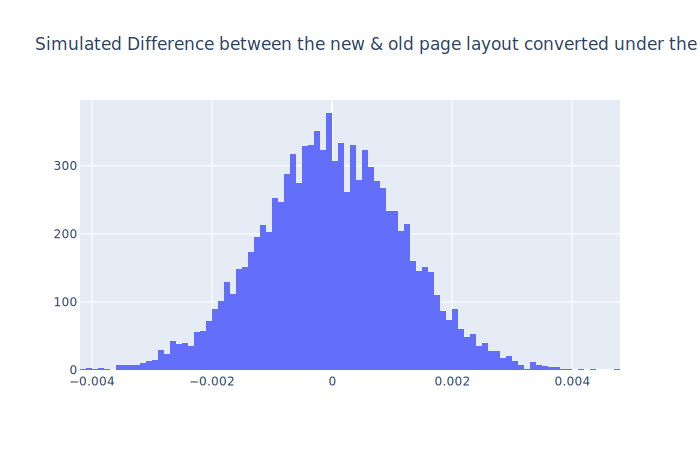

In [26]:
# plot sampling distribution
data = go.Histogram(x=p_diffs)
layout = go.Layout(title='Simulated Difference between the new & old page layout converted under the null hypothesis')
fig = go.Figure(data, layout)
fig.show(renderer='svg')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
df_control = df2[df2['group'] == 'control']
df_treatment = df2[df2['group'] == 'treatment']

# display observed difference
obs_diff = df_treatment.converted.mean() - df_control.converted.mean()
obs_diff

-0.0015782389853555567

In [28]:
print("The p-value is: {}".format((np.array(p_diffs) > obs_diff).mean()))

The p-value is: 0.9058


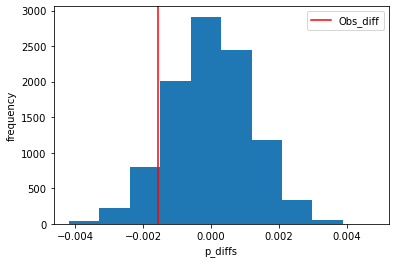

In [29]:
# plot line for observed statistic
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='r', label="Obs_diff")
plt.xlabel('p_diffs')
plt.ylabel('frequency')
plt.legend()
plt.show()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**
> 0.8957 is the proportion of the p_diffs that is greater than the actual difference observed in the orginal data, alos known as p-value. This value means that we cannot reject the null hypothesis and that we do not have sufficient evidence that the new_page layout would help achieving a higher conversion rate than the old_page one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
n_new = df2[df2["landing_page"] == "new_page"].shape[0]
n_old = df2[df2["landing_page"] == "old_page"].shape[0]
new_converted = df2[(df2["landing_page"] == "new_page") & (df2["converted"] == 1)].shape[0]
old_converted = df2[(df2["landing_page"] == "old_page") & (df2["converted"] == 1)].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([old_converted, new_converted], [n_old, n_new], value=None, alternative='smaller', prop_var=False)
print("z-score: {} \np-value: {}".format(z_score, p_value))

z-score: 1.3109241984234394 
p-value: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**
> Since we decide whether to accept or reject the null hypothesis based on `z-score` and `p-value`, we can end up from these two calculations that we **cannot reject the null hypothesis** since the `z-score` result is far away from -1.645 and the `p-value` result exceeds `alpha=0.05` which lead us to reject the alternative. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**
> A suitable choice will be `Logistic Regression`

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept'] = 1
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2['ab_page'] = df2['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
model = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
model_fit = model.fit()
model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        00:07:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**
> Since p-value is 0.19 which is bigger than 0.05 what proves that there is now statistical sgnificance. In part II, we implemented what so-called *one-tailed test* in which we found the conversion rate of the old_page is less than the conversion rate of the new_page. In return, in Part III, a two-tailed test proves that the landing_page layout influences, positively or negatively, the conversion rate. Comparatively speaking, the results do not support the alternative hypothesis sufficiently. Regarding the difference of p-value from part II to part III, I think this is due to perfrom two different kinds of statistical tests; one-tailed in part II and two-tailed test in part III. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
> Adding another factors to the process could of course help in confirming the alternative hypothesis or even feel more confident that out null hypothesis is still true.

> A disadvantage of adding these factors may lead to complexity when performing multi-linear regression relationship.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1


In [35]:
### Create the necessary dummy variables
unique_country = df_new['country'].unique()
df_new[unique_country]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,UK,US,CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,1,0


In [36]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
x = df_new[['CA', 'US', 'intercept', 'ab_page']]
y = df_new['converted']
lm = sm.Logit(y, x)
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        00:07:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA             0.0408      0.027      1.516      0.130      -0.012       0.093
US             0.0506      0.028      1.784      0.074      -0.005       0.106
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

> Applying a different approach than `ols` leads us to prove that adding `country` labels wouldn't help in accepting the alternative hypothesis. The p-value results report values that higher than 0.05 that's why we should reject the alternative and accept the null.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:

df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,UK,US,CA,US_ab_page,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,1,0,1,0,0


In [38]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA', 'US_ab_page', 'CA_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sat, 23 Jan 2021   Pseudo R-squ.:               2.691e-05
Time:                        00:07:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0453      0.031      1.481      0.139      -0.015       0.105
CA             0.0511      0.028      1.841      0.066      -0.003       0.105
US_ab_page     0.0108      0.023      0.475      0.635      -0.034       0.056
CA_ab_page    -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

In [39]:
print("Model paramteres are: \n{}".format(np.exp(results.params)))

Model paramteres are: 
intercept     0.130350
US            1.046352
CA            1.052380
US_ab_page    1.010893
CA_ab_page    0.979646
dtype: float64


<a id='conclusions'></a>
## Conclusions

> In conclusion, after performing A/B tests and linear regression analysis, we are evidently confident that the new page layout is not effective in increasing the conversion rates rather than the old page layout. P-values and coefcients prove that the null hypothesis that states "No difference in conversion rates between the old and new page layout" is true due to higher p-values more than the level of significance -alpha=0.05-. Even adding other factors such as `countries` doesn't help out anymore as we can see that there is almost an equal chance of the ab_page converting users in each country(1.04, 1.05, 1.01). Therefore we fail to reject the null hypothesis; the new page layout does not lead to convertion more than the old page layout.